In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud


In [78]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

print("----- DataFrame Head -----")
display(df.head())

print("\n----- DataFrame Shape -----")
print(df.shape)

print("\n----- DataFrame Info -----")
df.info()

----- DataFrame Head -----


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."



----- DataFrame Shape -----
(1600000, 6)

----- DataFrame Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [79]:
dts = pd.to_datetime(df["date"], errors="coerce")
df["date"] = dts
display(df.head())


C:\Users\queri\AppData\Local\Temp\ipykernel_30140\3763455881.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dts = pd.to_datetime(df["date"], errors="coerce")


,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [89]:
print(df.isnull().sum()) 
print(df.duplicated().sum())

target              0
ids                 0
date                0
flag                0
user                0
text                0
tweet_char_count    0
tweet_length        0
dtype: int64
0


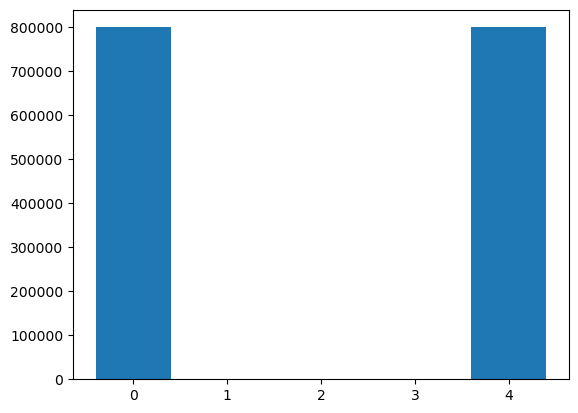

In [81]:
fig, ax = plt.subplots()
ax.bar(target_counts.index, target_counts.values)
plt.show()


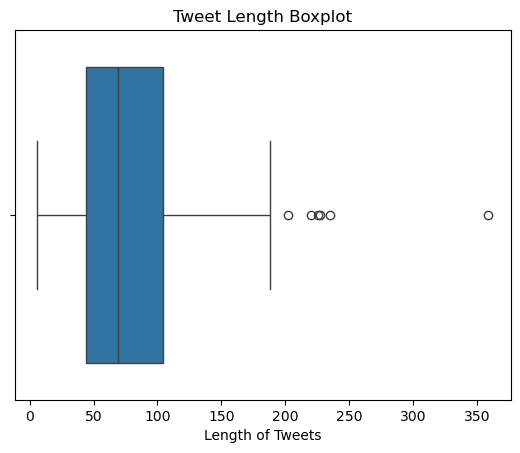

In [82]:
char_count = df['text'].apply(lambda tweet: len(tweet))
sns.boxplot(x=char_count)
plt.xlabel('Length of Tweets')
plt.title('Tweet Length Boxplot')
plt.show()

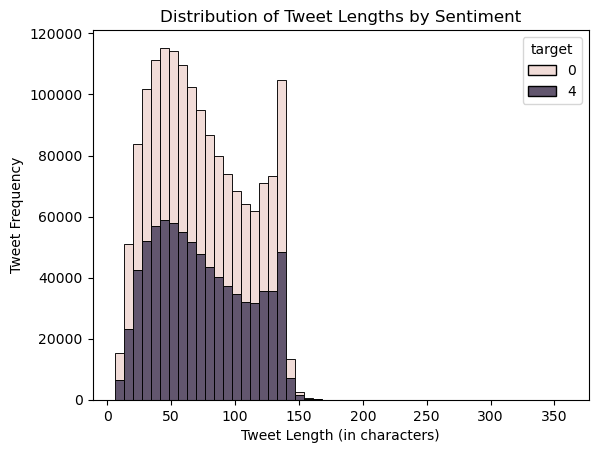

In [83]:
df['tweet_char_count'] = tweet_lengths
sns.histplot(data=df, x='tweet_char_count', hue='target', multiple='stack', bins=50)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Tweet Length (in characters)')
plt.ylabel('Tweet Frequency')
plt.show()


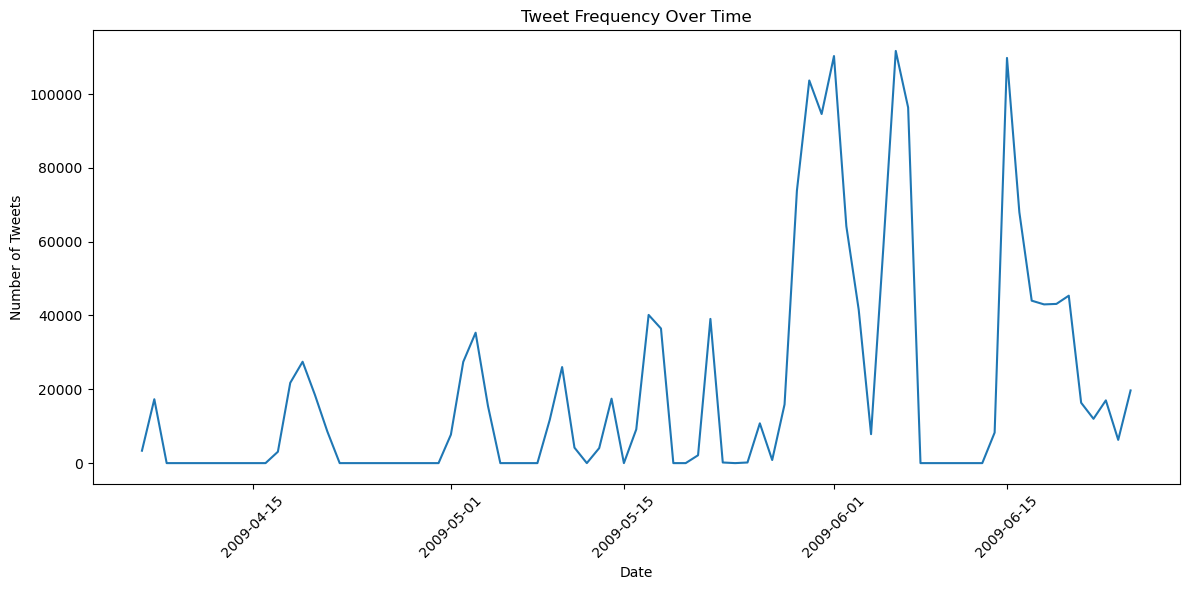

In [84]:
daily_counts = df.resample('D', on='date').size()
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Tweet Frequency Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
df.loc[:, 'tweet_length'] = df['text'].str.split().map(len)
print(df['tweet_length'].describe())


count    1.600000e+06
mean     1.317550e+01
std      6.957643e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      6.400000e+01
Name: tweet_length, dtype: float64


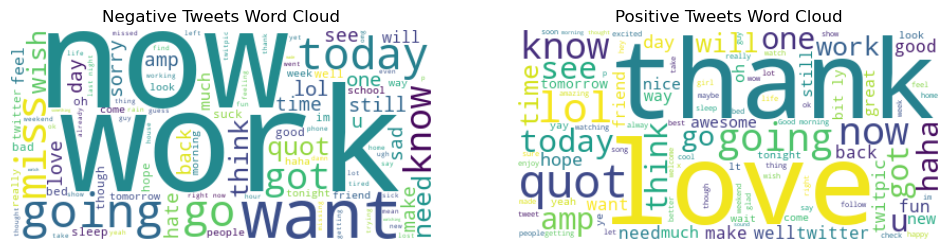

In [86]:
neg_df = df[df['target'] == 0]
pos_df = df[df['target'] == 4]

neg_text_all = " ".join(neg_df['text'].astype(str))
pos_text_all = " ".join(pos_df['text'].astype(str))

neg_cloud = WordCloud(background_color='white', max_words=100).generate(neg_text_all)
pos_cloud = WordCloud(background_color='white', max_words=100).generate(pos_text_all)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(neg_cloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(pos_cloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
plt.show()


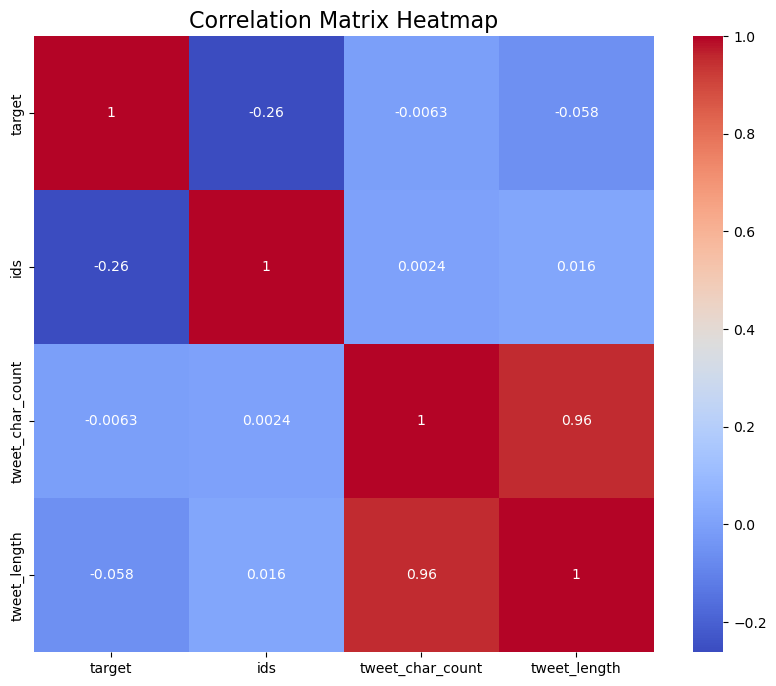

In [87]:
numerical_data = df.select_dtypes(include=['number'])
corr_matrix_data = numerical_data.corr()
plt.figure(figsize=(10, 8))
heatmap_plot = sns.heatmap(corr_matrix_data, annot=True, cmap="coolwarm")
heatmap_plot.set_title("Correlation Matrix Heatmap", fontdict={'fontsize': 16})
plt.show()


In [ ]:
%pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Sentiment140 Comprehensive EDA Report", explorative=True)
profile.to_notebook_iframe()


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   --------------------------------------- 666.4/666.4 kB 13.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=6a1690f4b09882c4a01a7c44f023a9febca6366a1903ef2c6a1bf2d3f77c0528
  Stored in directory: c:\users\queri\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]